# PreLecture HW

# Instruciton 1

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
# Load the penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [3]:
def compute_statistics(df, species, column):
    # Filter by species
    species_data = df[df['species'] == species][column].dropna()

    # Compute statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    std_dev = species_data.std()
    iqr = np.percentile(species_data, 75) - np.percentile(species_data, 25)

    return mean, median, min_val, max_val, iqr, std_dev

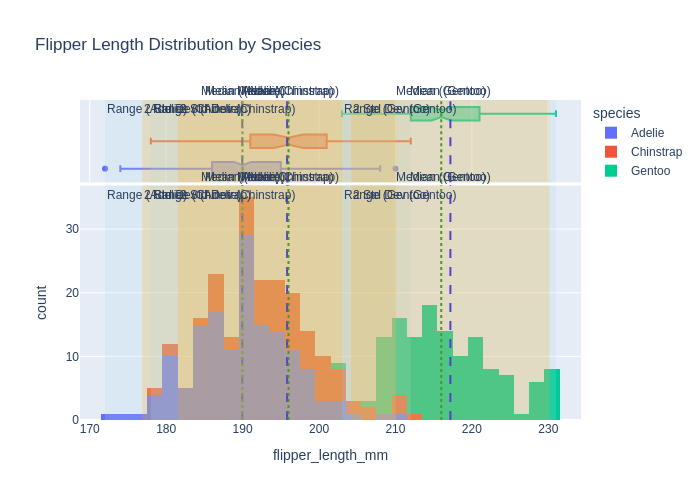

In [89]:
# Create the base plotly histogram
fig = px.histogram(pingees, x="flipper_length_mm", color="species", nbins=30, marginal="box", title="Flipper Length Distribution by Species")

# Loop through each species and add lines/rectangles for mean, median, and other statistics
for species in pingees['species'].unique():
    # Compute statistics for the current species
    mean, median, min_val, max_val, iqr, std_dev = compute_statistics(pingees, species, 'flipper_length_mm')

    # Add horizontal lines for mean and median
    fig.add_vline(x=mean, line_dash="dash", line_color="blue", annotation_text=f"Mean ({species})", annotation_position="top")
    fig.add_vline(x=median, line_dash="dot", line_color="green", annotation_text=f"Median ({species})", annotation_position="top")

    # Add vertical rectangles for range and IQR
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightblue", opacity=0.2, line_width=0, annotation_text=f"Range ({species})", annotation_position="top left")
    fig.add_vrect(x0=mean - std_dev * 2, x1=mean + std_dev * 2, fillcolor="orange", opacity=0.2, line_width=0, annotation_text=f"2 Std Dev ({species})", annotation_position="top left")

# Show the plot
fig.show(renderer="png")


# Instruction 2

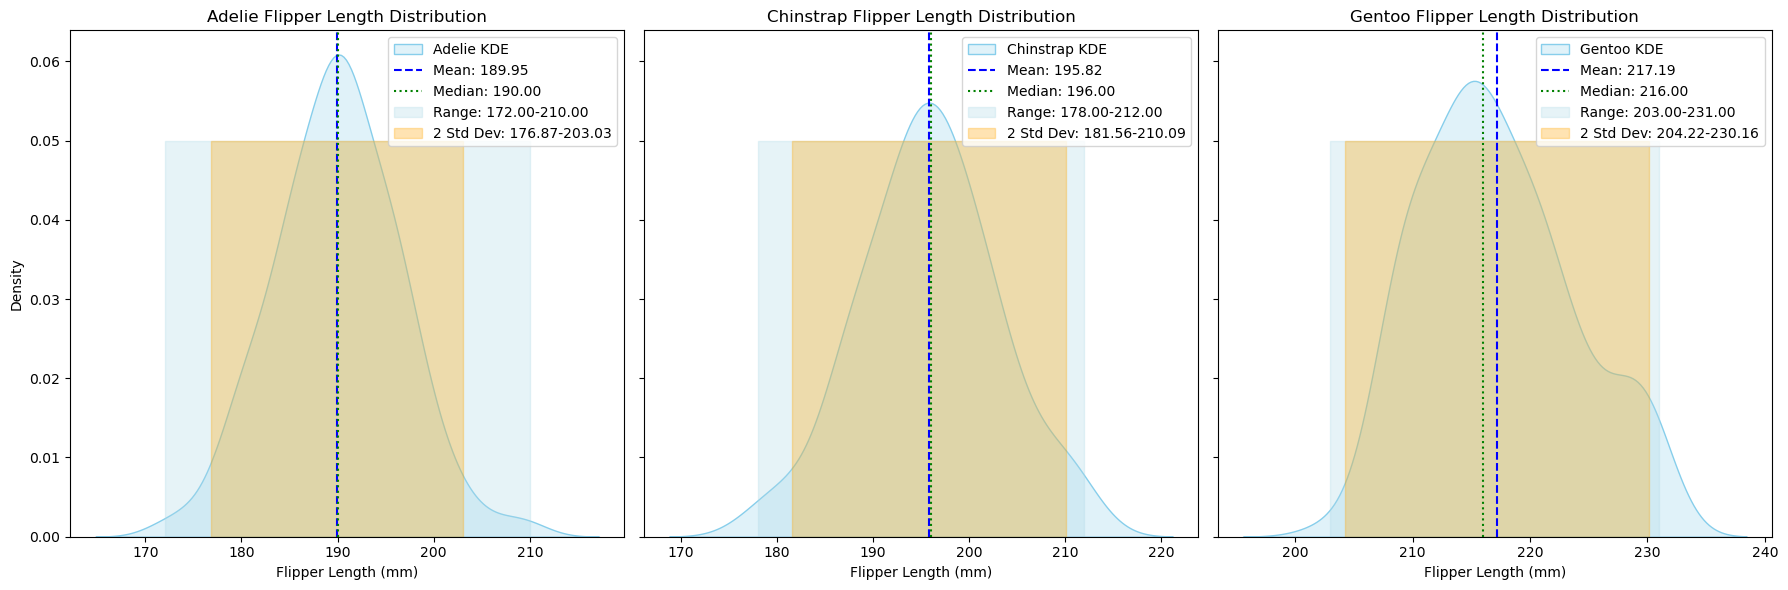

In [13]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Function to compute statistics
def compute_statistics(df, species, column):
    species_data = df[df['species'] == species][column].dropna()

    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    std_dev = species_data.std()
    iqr = np.percentile(species_data, 75) - np.percentile(species_data, 25)

    return mean, median, min_val, max_val, iqr, std_dev

# Set up the figure and axes (fixing the figure size and ensuring 3 subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Filter out NaN values in 'species' column
species_list = pingees['species'].dropna().unique()

# Loop through each species to create KDE plots
for i, species in enumerate(species_list):
    ax = axes[i]
    species_data = pingees[pingees['species'] == species]['flipper_length_mm'].dropna()

    # Plot KDE using seaborn
    sns.kdeplot(species_data, ax=ax, fill=True, color='skyblue', label=f'{species} KDE')

    # Compute statistics
    mean, median, min_val, max_val, iqr, std_dev = compute_statistics(pingees, species, 'flipper_length_mm')

    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle=':', label=f'Median: {median:.2f}')

    # Add shaded areas for range and two standard deviations using fill_between
    ax.fill_betweenx([0, 0.05], min_val, max_val, color='lightblue', alpha=0.3, label=f'Range: {min_val:.2f}-{max_val:.2f}')
    ax.fill_betweenx([0, 0.05], mean - 2 * std_dev, mean + 2 * std_dev, color='orange', alpha=0.3, label=f'2 Std Dev: {mean - 2 * std_dev:.2f}-{mean + 2 * std_dev:.2f}')

    # Add titles and labels
    ax.set_title(f'{species} Flipper Length Distribution')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Instruction 3

In [ ]:
#ChatGPT and my Discussion about Box Plot, Histograms, and Kernel Density Estimator
"""

Me: 
Let's discuss about box plot, histograms, and kernel density estimator.
What do you think for my constrasting descriptions? Do you agree or not? 
What "pros and cons" of these three "data distribution"?

For me, box plots are much simpler compared to the other two and can directly display key statistical measures. 
Additionally, they easily show the median, interquartile range, minimum, and maximum values.

As for histograms, I find they provide more detail about the frequency distribution of the data (y) based on 
specific values of x. You can directly observe where y reaches its highest and lowest points, along with other
distribution characteristics.

Kernel Density Estimators, on the other hand, provide a smooth and continuous representation of the data 
distribution, which makes them appear more convincing and natural.
    

ChatGPT:
Your descriptions are insightful! Let’s break down the pros and cons of each type of data distribution 
visualization—box plots, histograms, and kernel density estimators (KDE)—to see how they compare.

1. Box Plot

Pros:
- Simplicity: Box plots provide a straightforward summary of data distribution.
- Key Statistical Measures: They directly show median, quartiles, range, and potential outliers.
- Comparison: Useful for comparing distributions across multiple groups or categories.
- Outliers: Clearly highlights outliers.

Cons:
- Detail: Lacks granularity in the data distribution; doesn’t show the shape or frequency of data points.
- Assumptions: Assumes data is approximately normally distributed; less informative for skewed distributions.
- No Frequency Information: Doesn’t provide information on the frequency of values.

2. Histogram

Pros:
- Frequency Distribution: Shows how frequently data falls into different bins, giving insight into the shape of the distribution.
- Detail: Provides detailed information about the distribution and can reveal patterns like skewness, modality, etc.
- Intuitive: Easy to understand and interpret by showing how data is distributed across intervals.

Cons:
- Bin Sensitivity: Results can be sensitive to the choice of bin width and number of bins.
- Overlapping Data: If data is sparse, histograms might not provide clear insight. 
- Less Precise: Can be less precise in showing the underlying data distribution compared to KDE.

3. Kernel Density Estimator (KDE)

Pros:
- Smooth Representation: Provides a smooth, continuous estimate of the data distribution, which can be easier to interpret.
- Visual Appeal: Often looks more natural and convincing, particularly for showing the overall distribution shape.
- Detail: Provides a better sense of the density and distribution of data points.

Cons:
- Bandwidth Sensitivity: Results can be highly sensitive to the choice of bandwidth (smoothing parameter).
- Over-Smoothing: May obscure important features of the data if over-smoothed.
- Interpretation: May be harder to interpret compared to histograms or box plots, especially with skewed or multimodal data.

Summary:
- Box Plots are great for a quick, simple summary of key statistics and comparison across groups, but they lack detail about the data distribution.
- Histograms offer detailed frequency information and are useful for understanding the distribution shape, though they depend on bin settings and can be cluttered with sparse data.
- KDEs provide a smooth, continuous view of the data distribution and are visually appealing, but they can be sensitive to smoothing parameters and may hide details.

Your observations align well with these pros and cons. Box plots give a quick snapshot of key statistics, 
histograms reveal detailed distribution characteristics, and KDEs offer a smooth and visually appealing distribution 
view. Each method has its strengths and is best suited to different contexts depending on what aspects of the data 
you want to emphasize.

"""

In [18]:
#My Preference: Kernel Density Estimator
"""
I really like Kernel Density Estimators (KDE) because they show data distribution in a smooth, flowing way. 
This smooth curve helps me see the overall shape of the data clearly, which is really useful for understanding 
how data is spread out.

Box plots are great for giving a quick summary of key statistics like the median and range, while histograms show 
how often data falls into different ranges. But KDEs take it a step further by providing a continuous view of the 
data. This means I can see how dense or spread out the data is without getting bogged down by specific details like
bin sizes or exact numbers.

In short, KDEs give a more natural and detailed picture of the data’s distribution, making them my favorite choice 
for understanding and visualizing data trends.
"""

In [ ]:
#Summary ChatGPT session:
"""
Summary of Today’s Session

1. Combining Seaborn and Matplotlib:
   - We discussed integrating `seaborn` KDE plots with `matplotlib` features. You wanted to use `ax.axhspan()` and `ax.fill_between()` to highlight mean, median, range, and standard deviations on KDE plots.
   - Updated Code: Provided code to generate KDE plots for each species of penguins using `seaborn`, and added vertical lines and shaded areas using `matplotlib` to mark statistical measures and ranges.

2. Visualizing Data Distributions:
   - We compared three types of data distribution visualizations: box plots, histograms, and kernel density estimators (KDE).
   - Box Plots:
     - Pros: Simple, shows median, quartiles, range, and outliers. Good for comparison across groups.
     - Cons: Lacks detail on the distribution shape and frequency of values.
   - Histograms:
     - Pros: Shows frequency distribution, detailed and intuitive, reveals distribution patterns.
     - Cons: Sensitive to bin choice, less precise in showing data distribution compared to KDE.
   - KDE:
     - Pros: Smooth, continuous representation, visually appealing, shows density and distribution shape.
     - Cons: Sensitive to bandwidth choice, may over-smooth, harder to interpret compared to histograms and box plots.

3. Your Preferences and Insights:
   - You prefer combining seaborn with matplotlib for customized plots rather than using plotly.
   - You find box plots simpler and effective for displaying key statistical measures, histograms detailed for frequency distribution, and KDEs visually convincing for showing smooth data distribution.

This session provided a clear comparison of the strengths and limitations of each visualization method and demonstrated how to effectively combine seaborn and matplotlib for enhanced data representation.
"""
#LINK CHATGPT LOG HISTORY:
#https://chatgpt.com/share/66f5b3f7-0b94-8002-950b-5340e0db8952

# Instruction 4

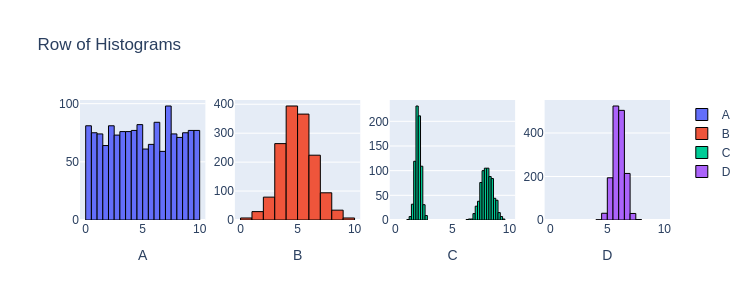

In [90]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
#My Answer:
"""
Which datasets have similar means and similar variances
- Dataset A and C

Which datasets have similar means but quite different variances
- Dataset B and C

Which datasets have similar variances but quite different means
- Dataset B and D

Which datasets have quite different means and quite different variances
- Dataset C and D

"""

# PostLecture HW 

# Instruction 5

In [53]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

In [ ]:
#My Answer about the relationship between the mean and median, right and left skewness, and what causis this.
"""
The relationship between mean and median is basically about how both mean and median giving a sens of the center of 
a dataset. In this case, the mean can be heavily influenced by outliers, whereas the median can provide a central 
tendency in skeweed distributions.

For skewed distributions:
- Right Skewed or Positively Skewed : The mean is typically greater than the median.
- Left Skewed or Negatively Skewed : The mean is typically less than the median.

Based on the code:

1. Right-Skewed Distribution is sample 1(sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
Most of the data points are concentrated on the left, with a long tail extending to the right.
Mean vs. Median: The mean is typically greater than the median because the mean is influenced by the long right tail. 
The histogram created by fig1 will show a distribution with a long tail on the right side.

2. Left-Skewed Distribution is sample 2 (sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000))
Most of the data points are concentrated on the right, with a long tail extending to the left.
Mean vs. Median: The mean is typically less than the median because the mean is pulled down by the long left tail.
"""

In [ ]:
#Summary of my chat session with ChatBot for 5:

"""
Sure! Here’s a summary of our chat:

1. Mean vs. Median:
   - Mean: Average of all values; sensitive to outliers.
   - Median: Middle value; less sensitive to outliers.

2. Skewness:
   - Right-Skewed (Positively Skewed): Tail extends to the right; mean > median.
   - Left-Skewed (Negatively Skewed): Tail extends to the left; mean < median.

3. Code Explanation:
   - Right-Skewed Data: `sample1` from Gamma distribution; histogram will show a peak on the left with a tail to the right. Mean will be higher than the median.
   - Left-Skewed Data: `sample2` is the negative of the Gamma distribution; histogram will show a peak on the right with a tail to the left. Mean will be lower than the median.

The code you’re using helps visualize and compare the effects of skewness on the mean and median by generating and plotting these skewed distributions.
"""

#Link for ChatGPT session:https://chatgpt.com/share/66f5bb2d-2dec-8002-aa8d-b2676669b5fc

# Instruction 6

In [ ]:
#My TUT Group Steps to understand dataset is:
"""
1. Know what the data is about: First, figure out what the data represents and why it was collected. 
Who needs this information and what do they want to learn?

2. Clean the data: Make sure the data is correct by fixing any missing or strange values. 
This helps us get accurate results later.

3. Look at the data: Use simple stats like averages and create charts to spot any patterns or interesting details 
in the data.

3. Analyze and explain: Finally, do basic analysis like comparing groups or checking relationships between things. 
Then explain what you find in a clear, simple way.
"""

In [66]:
#Step 1:Know What the Data is About

"""
Description: Before diving into the analysis, understand the dataset's purpose. 
This dataset seems to be about athletes participating in the Olympics, which includes various details such as 
athlete demographics and events. 

This information can be useful for:
- Sports Analysts: Understanding trends and patterns in Olympic participation.
- Researchers: Studying the impact of demographics on performance.
- Sports Organizations: Making decisions about future events and athlete support.

"""

In [67]:
# Load the data
import pandas as pd

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv'
olympics_df = pd.read_csv(url)

# Display the first few rows and column names
print("First few rows of the data:")
print(olympics_df.head())

print("\nColumn names:")
print(olympics_df.columns)


First few rows of the data:
   id                      name sex   age  height  weight            team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   noc        games  year  season       city          sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              event medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN 

In [ ]:
#Step 2: Clean the Data
"""
Description: Data cleaning involves identifying and fixing issues like missing values or inconsistencies. 
This ensures the accuracy of your analysis.
"""

In [68]:
# Check for missing values
print("Missing values in each column:")
print(olympics_df.isnull().sum())

# Handle missing values
# For simplicity, let's drop rows with missing values (you can also impute missing values if needed)
cleaned_df = olympics_df.dropna()

# Verify that missing values are handled
print("\nMissing values after cleaning:")
print(cleaned_df.isnull().sum())


Missing values in each column:
id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

Missing values after cleaning:
id        0
name      0
sex       0
age       0
height    0
weight    0
team      0
noc       0
games     0
year      0
season    0
city      0
sport     0
event     0
medal     0
dtype: int64


In [ ]:
#Step 3: Look at the Data
"""
Use descriptive statistics and visualizations to understand the basic characteristics of the dataset.
"""

Summary statistics:
                   id                     name    sex           age  \
count    30181.000000                    30181  30181  30181.000000   
unique            NaN                    20732      2           NaN   
top               NaN  Michael Fred Phelps, II      M           NaN   
freq              NaN                       28  19831           NaN   
mean     70225.949604                      NaN    NaN     25.429012   
std      38839.720551                      NaN    NaN      5.049684   
min         16.000000                      NaN    NaN     13.000000   
25%      37494.000000                      NaN    NaN     22.000000   
50%      69771.000000                      NaN    NaN     25.000000   
75%     104111.000000                      NaN    NaN     28.000000   
max     135563.000000                      NaN    NaN     66.000000   

              height        weight           team    noc        games  \
count   30181.000000  30181.000000          30181  301

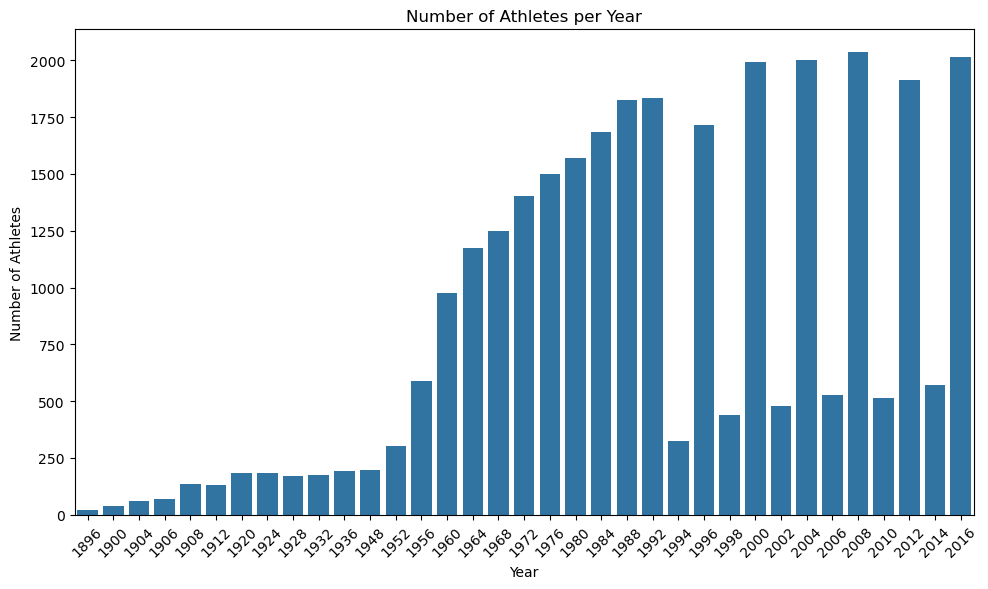

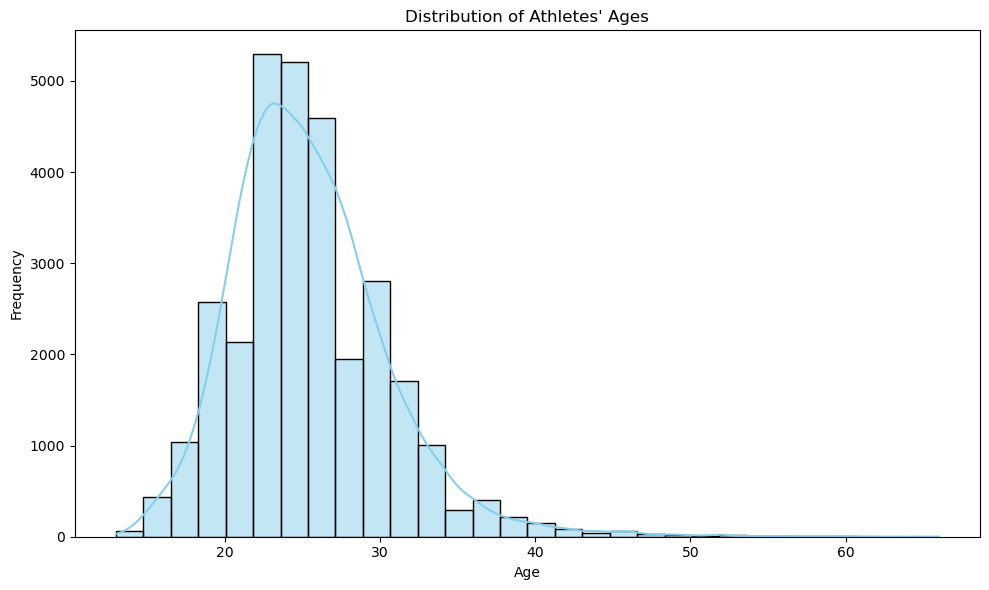

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display summary statistics
print("Summary statistics:")
print(cleaned_df.describe(include='all'))

# Distribution of athletes by year
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df, x='year')
plt.title('Number of Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of athletes' ages
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Athletes\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
#Step 4: Analyze and Explain

Summary Statistics:
                   id                  name     sex            age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN                134731       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.556898   
std      39022.286345                   NaN     NaN       6.393561   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      21.000000   
50%      68205.000000                   NaN     NaN      24.000000   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               height         weight           team     noc        games  \
count   210945.000000  208241.000000         271116  271116    

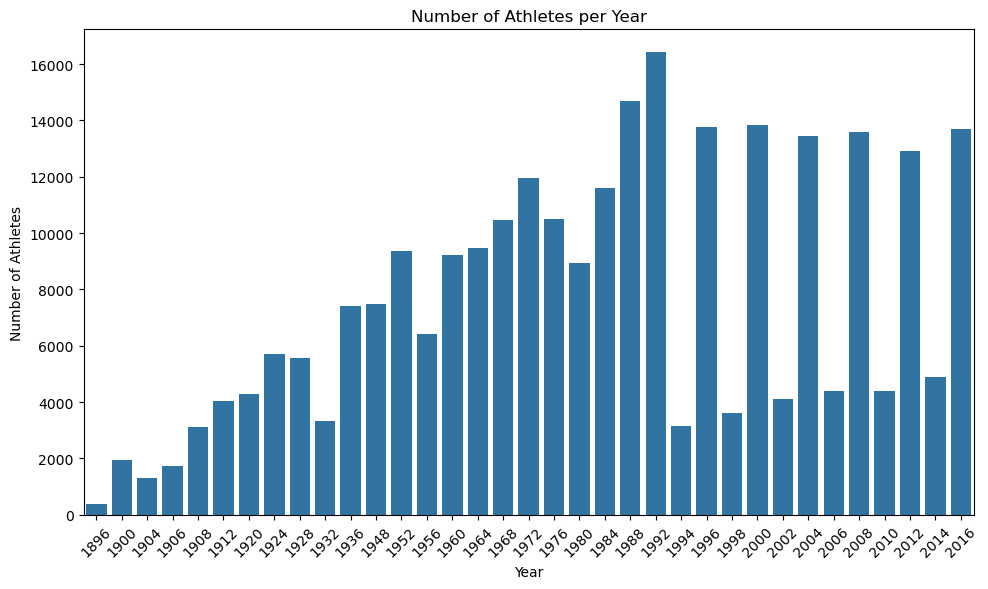

/tmp/ipykernel_70/3501225873.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




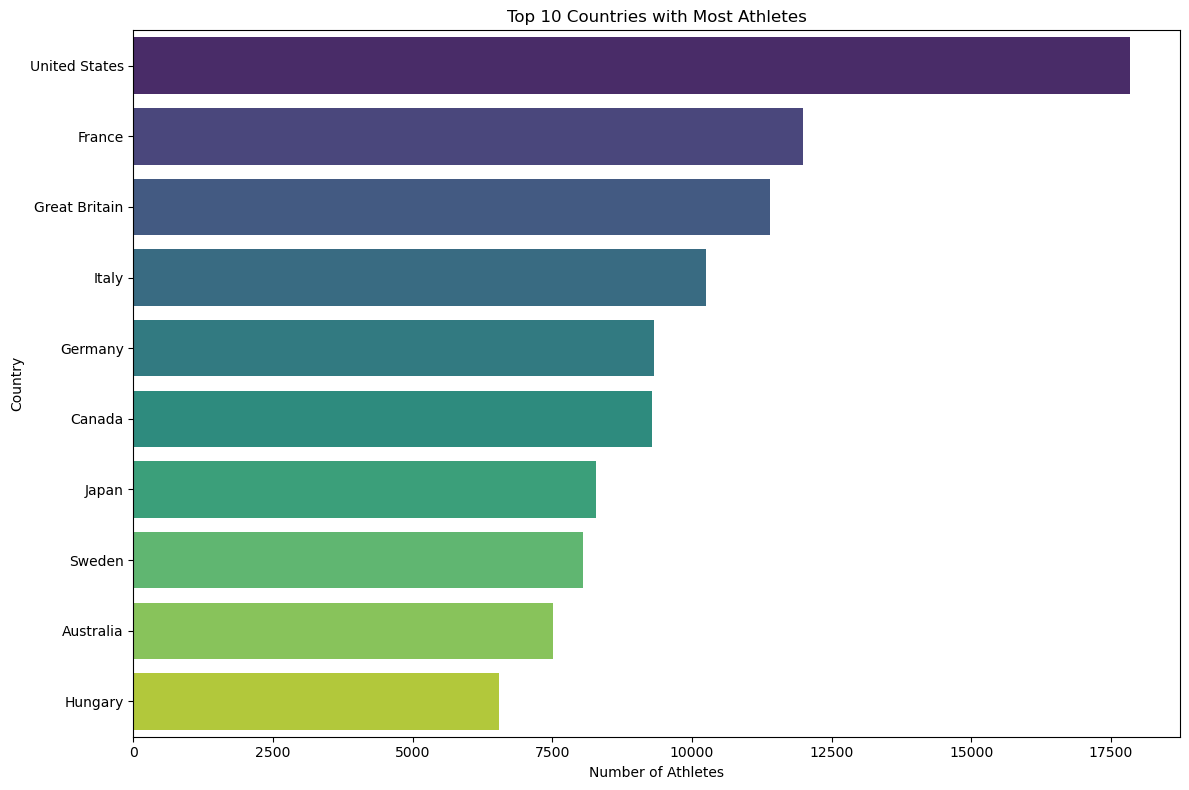

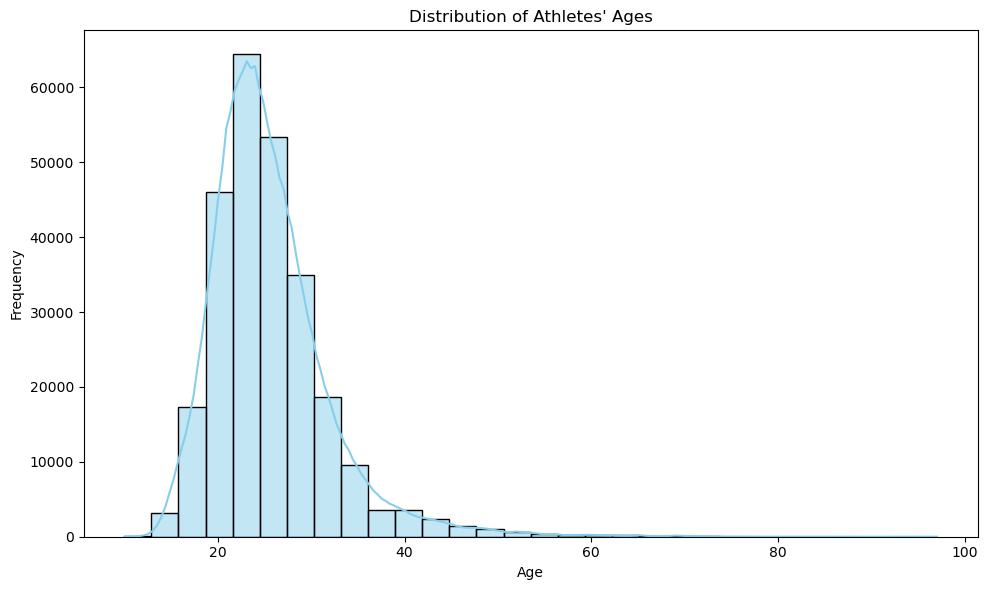

/tmp/ipykernel_70/3501225873.py:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




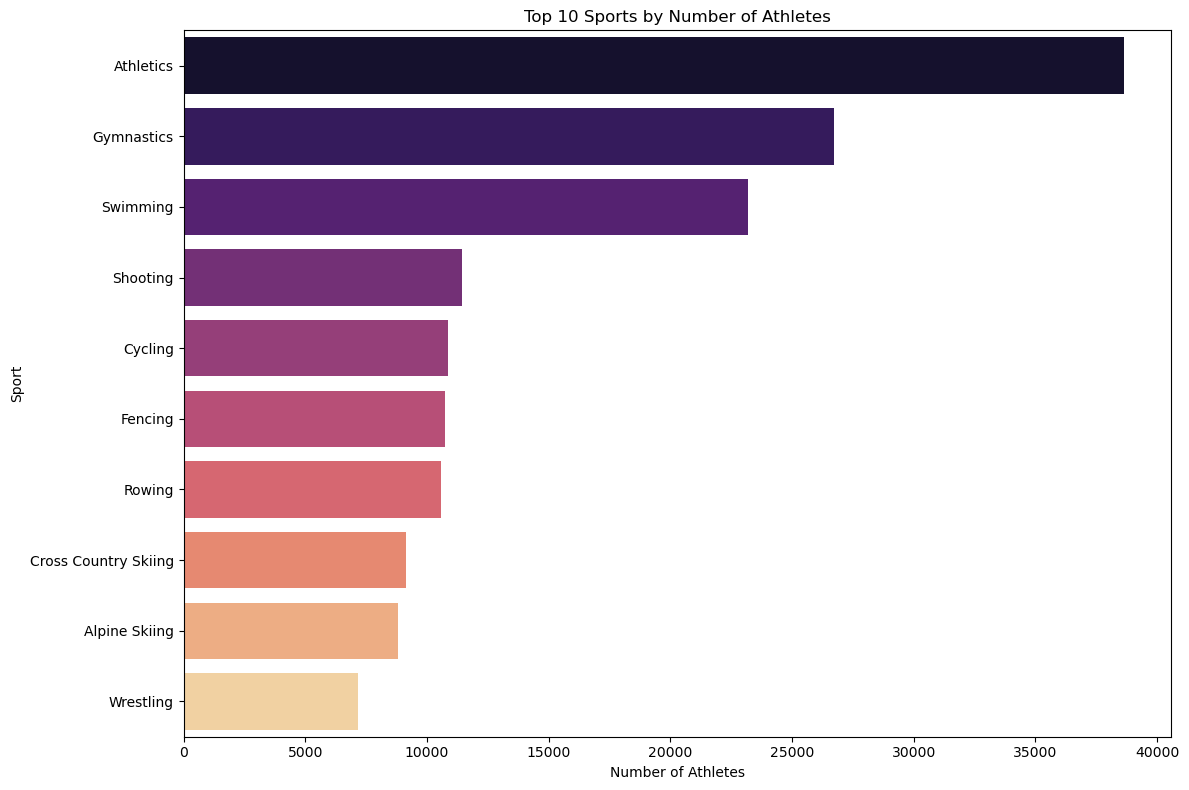

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv'
olympics_df = pd.read_csv(url)

# Display summary statistics
print("Summary Statistics:")
print(olympics_df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(olympics_df.isnull().sum())

# Data types and unique values
print("\nData Types and Unique Values:")
print(olympics_df.dtypes)
print(olympics_df.nunique())

# Visualizations

# 1. Distribution of athletes by year
plt.figure(figsize=(10, 6))
sns.countplot(data=olympics_df, x='year')
plt.title('Number of Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 countries with the most athletes
top_countries = olympics_df['team'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Athletes')
plt.xlabel('Number of Athletes')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 3. Distribution of athletes' ages
plt.figure(figsize=(10, 6))
sns.histplot(olympics_df['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Athletes\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Number of athletes by sport
plt.figure(figsize=(12, 8))
top_sports = olympics_df['sport'].value_counts().head(10)
sns.barplot(x=top_sports.values, y=top_sports.index, palette='magma')
plt.title('Top 10 Sports by Number of Athletes')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()


In [ ]:
#Explanation
"""
1. Number of Athletes per Year: A count plot showing the number of athletes per year.
2. Top 10 Countries with Most Athletes: A bar plot of the top 10 countries with the most athletes.
3. Distribution of Athletes' Ages: A histogram with KDE showing the age distribution of athletes.
4. Top 10 Sports by Number of Athletes: A bar plot of the top 10 sports with the most athletes.
"""

In [ ]:
#Chat GPT Summary
"""
Here's a summary of our chat session:

1. Data Loading and Syntax Issue:
   - You encountered an issue with R syntax in a Python environment. The correct Python code to load the 
   data uses `pandas`.

2. Code for Analysis and Visualization:
   - We discussed how to perform data analysis and visualization using Python. I provided code for:
     - Loading the data using `pandas`.
     - Displaying summary statistics and checking for missing values.
     - Creating visualizations including the distribution of athletes by year, the top 10 countries with 
     the most athletes, the distribution of athletes' ages, and the top 10 sports by number of athletes.

3. Steps for Data Analysis:
   - Know What the Data is About: Understand the dataset's purpose and potential users.
   - Clean the Data: Handle missing values to ensure accuracy.
   - Look at the Data: Use descriptive statistics and visualizations to identify patterns.
   - Analyze and Explain: Perform basic analyses, such as comparing groups or checking relationships, 
   and provide clear explanations of your findings.

Feel free to ask if you need further details or help with any specific aspect!
"""
#Link Chat History:https://chatgpt.com/share/66f5c799-3280-8002-b3dc-2757b3834e30

# Instruction 7

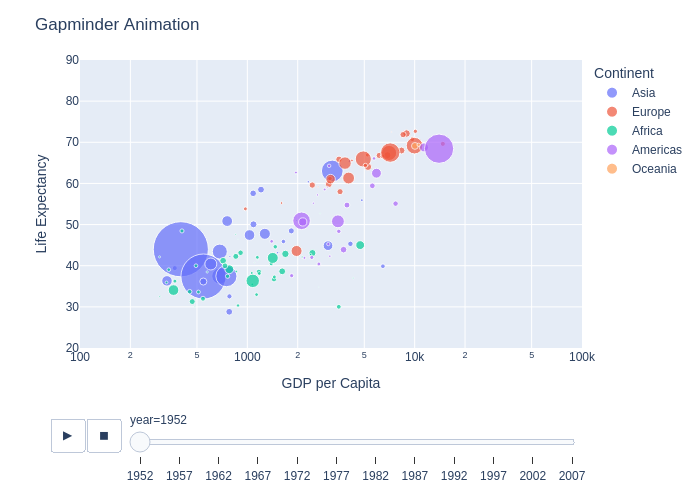

In [88]:
import plotly.express as px
import pandas as pd

# Load the Gapminder dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
df = pd.read_csv(url)

# Create the animated scatter plot
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=60, range_x=[100,100000],
                 range_y=[20,90])

# Update layout for better aesthetics
fig.update_layout(title="Gapminder Animation",
                  xaxis_title="GDP per Capita",
                  yaxis_title="Life Expectancy",
                  legend_title="Continent")

# Show the plot
fig.show(renderer="png")


# Instruction 8

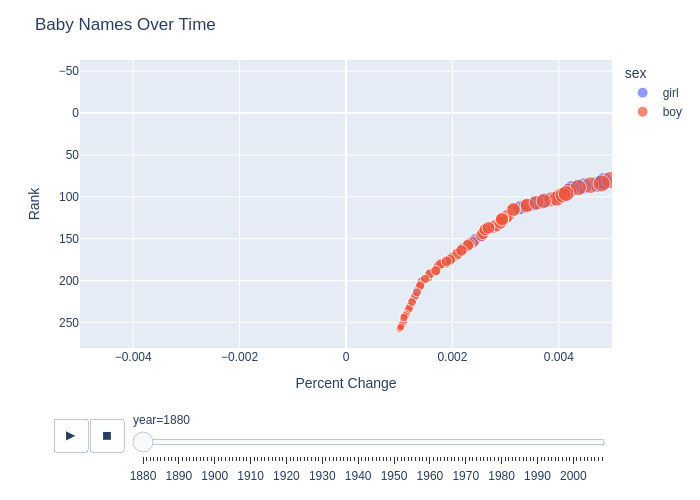

In [87]:
import plotly.express as px
import pandas as pd

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate rank and percent change
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])
bn['percent change'] = bn.groupby('name')['percent'].diff()

# Set the percent change for new names
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort and filter the data
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

# Create the scatter plot
fig = px.scatter(
    bn, 
    x="percent change", 
    y="rank", 
    animation_frame="year",
    animation_group="name",
    size="percent", 
    color="sex", 
    hover_name="name",
    size_max=50, 
    range_x=[-0.005, 0.005]
)

# Update layout
fig.update_layout(title="Baby Names Over Time",
                  xaxis_title="Percent Change",
                  yaxis_title="Rank")

# Reverse y-axis so rank 1 is on top
fig.update_yaxes(autorange='reversed')

# Show the plot
fig.show(renderer="png")


In [ ]:
#Chat GPT Summary 
"""
In our chat session, we discussed:

1. Gapminder Animation in Plotly:
   - Provided a basic example of creating a Gapminder-style animation using Plotly Express, replacing the incorrect function `scatter_gapminder` with the general `scatter` function.

2. Custom Scatter Plot:
   - Created a customized scatter plot with specific requirements using the `baby-names.csv` dataset.
   - Adjusted the scatter plot parameters for `x`, `y`, `size`, `color`, `animation_frame`, `animation_group`,
   and `hover_name`.
   - Removed `log_x=True` and `range_y` parameters, and set `size_max=50` and `range_x` to `[-0.005, 0.005]`.
   - Updated y-axis to be reversed to place the highest rank on top and ensured the plot is rendered as a PNG 
   for submission purposes.

Let me know if you need further details or assistance!

"""
#Link History:https://chatgpt.com/share/66f5c7da-165c-8002-8ae2-a6e9fc0ed91e

# Instruction 9

Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?


Yes, but not completely. I tried to review and understand the course wiki-textbook.